In [ ]:
#Devesh Khanna Python and Data Science Course (IBM) minor project
#EDA & K-Means Clusturing
#Patient charges across regions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Load the data
df = pd.read_csv('insurance.csv')

In [ ]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   region            1338 non-null   object 
 6   charges           1338 non-null   float64
 7   age_cat           1338 non-null   object 
 8   weight_condition  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [ ]:
#Describe the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,age_cat
1333,50,male,30.97,3,no,northwest,10600.5483,Senior Adult
1334,18,female,31.92,0,no,northeast,2205.9808,Young Adult
1335,18,female,36.85,0,no,southeast,1629.8335,Young Adult
1336,21,female,25.80,0,no,southwest,2007.9450,Young Adult
1337,61,female,29.07,0,yes,northwest,29141.3603,Elder


In [ ]:
#Find null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
age_cat     0
dtype: int64

In [ ]:
#Datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
age_cat      object
dtype: object

In [ ]:
#Correlation 
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Thu, 09 Mar 2023   Prob (F-statistic):            0.00268
Time:                        14:50:40   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
df["weight_condition"] = np.nan
lst = [df]
for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
df.head(10)

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight
5,31,female,25.740,0,no,southeast,3756.62160,Young Adult,Overweight
6,46,female,33.440,1,no,southeast,8240.58960,Senior Adult,Obese
7,37,female,27.740,3,no,northwest,7281.50560,Senior Adult,Overweight
8,37,male,29.830,2,no,northeast,6406.41070,Senior Adult,Overweight
9,60,female,25.840,0,no,northwest,28923.13692,Elder,Overweight


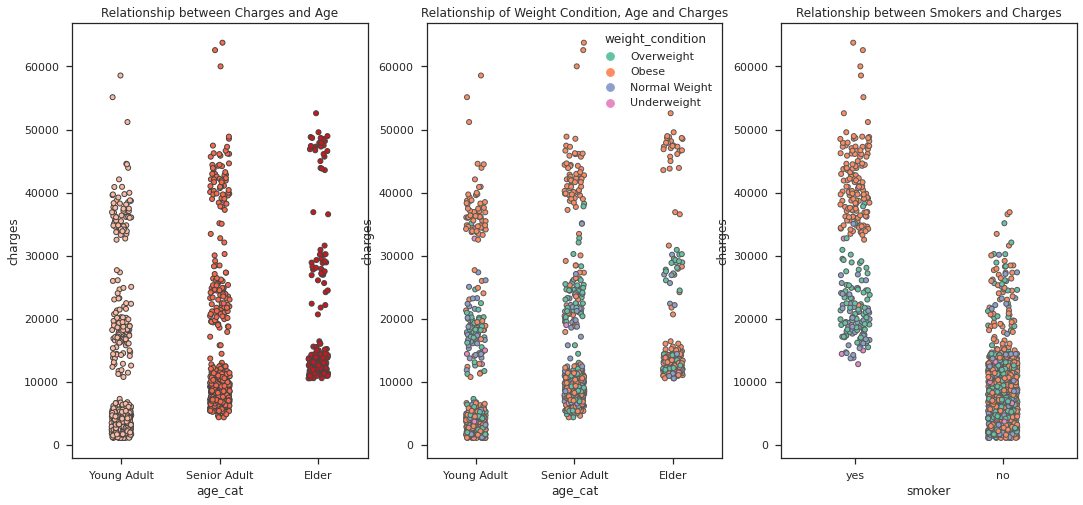

In [ ]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))
# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")
sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")
sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")
plt.show()

Text(0.5, 1.0, 'Smokers')

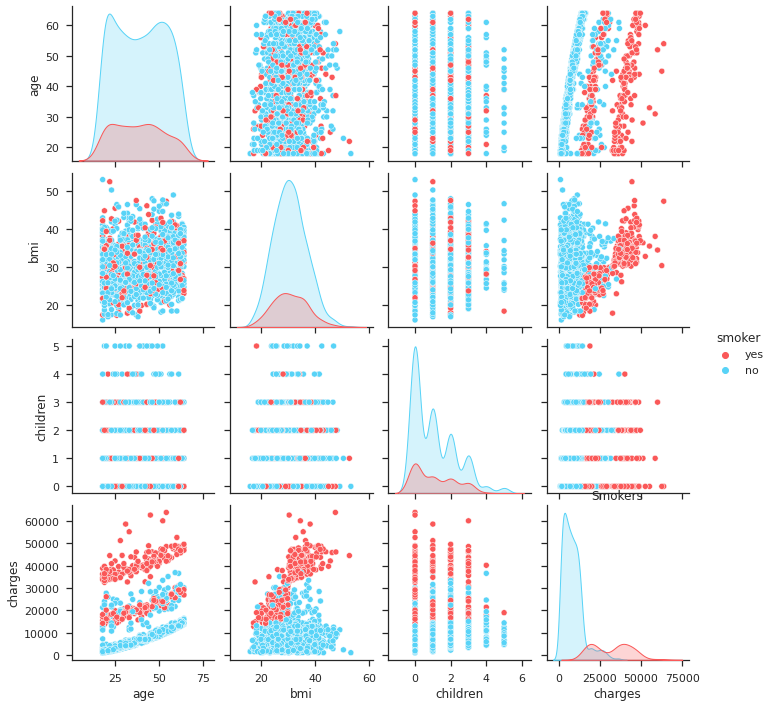

In [ ]:
import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]
sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

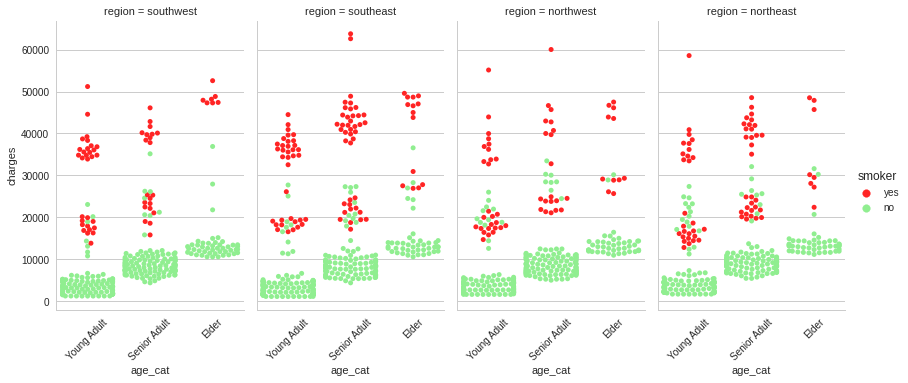

In [ ]:
plt.style.use('seaborn-whitegrid')

ticks = df['age_cat'].unique()
colors = ['#ff2424', '#90ee90']


ax = sns.catplot(x="age_cat", y="charges", hue="smoker",
                 col="region", aspect=.6,
                 kind="swarm", palette=colors, data=df);

ax.set_xticklabels(labels = ticks, rotation=45)

plt.show()

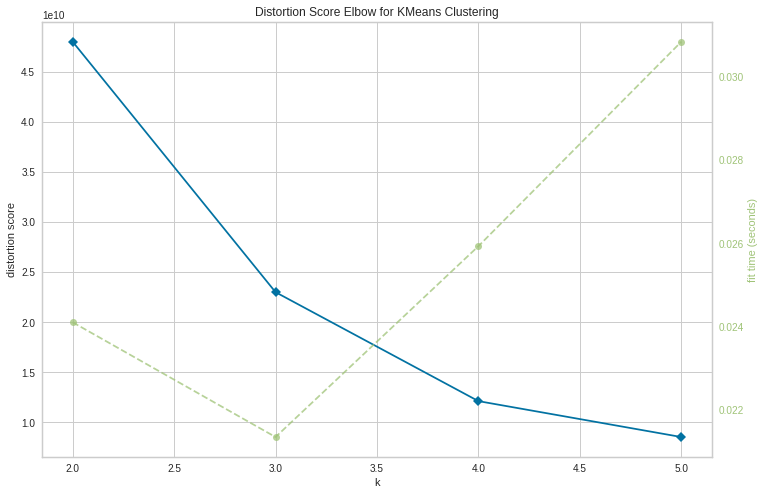

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
X = df[["bmi", "charges"]]
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

In [ ]:
# Printing the Centroids
print(kmeans.cluster_centers_)

[[3.48454321e+01 4.07613086e+04]
 [3.04800394e+01 6.43014804e+03]
 [2.88763542e+01 1.88976443e+04]]


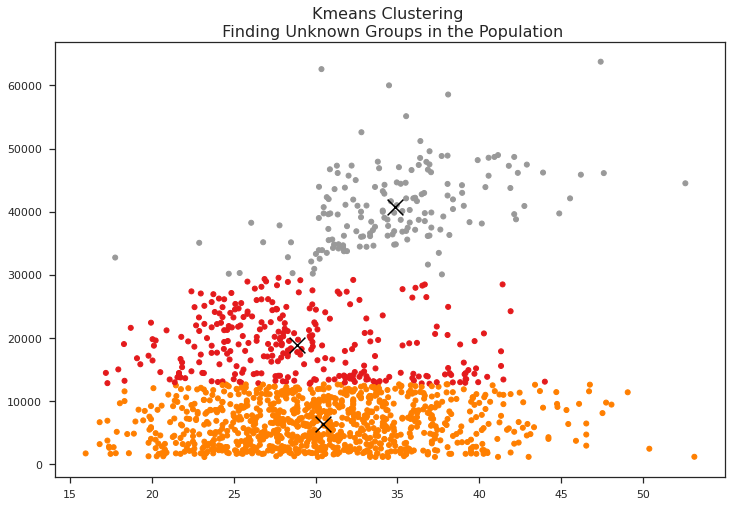

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

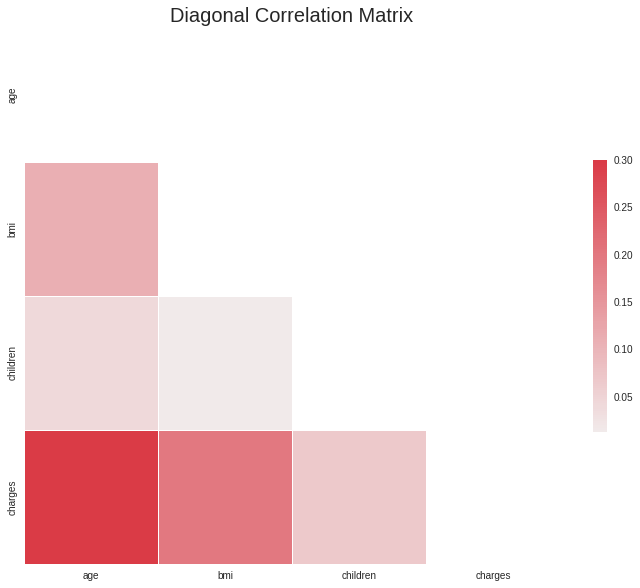

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Diagonal Correlation Matrix", fontsize=20)

plt.show()

In [ ]:
corr = df.corr()
hm = go.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist()
)
data = [hm]
layout = go.Layout(title="Correlation Heatmap")
fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

In [ ]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')